GROUP MEMBERS :
1.  Aniruddh Shukla 
2. Gaurav Singhal 
3. Himanshi Bajaj 


In [ ]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks")
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import zipfile

In [ ]:
local_zip = "/content/drive/My Drive/Colab Notebooks/cifar_attempts.zip"
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall()
zip_ref.close()

# Model

In [ ]:
# VGG-16 inspired model

model = tf.keras.Sequential([ tf.keras.layers.Conv2D(filters= 64, kernel_size= 3 , input_shape=(32,32,3),padding='same',activation='relu'),
                              tf.keras.layers.ZeroPadding2D(padding=(1,1)),
                              tf.keras.layers.Conv2D(filters= 64, kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                             
                              tf.keras.layers.Conv2D(filters= 128, kernel_size= 3, input_shape=(),padding='same',activation='relu'),
                              tf.keras.layers.ZeroPadding2D(padding=(1,1)),
                              tf.keras.layers.Conv2D(filters= 128, kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                             
                              tf.keras.layers.Conv2D(filters= 256 , kernel_size= 3, input_shape=(),padding='same',activation='relu'),
                              tf.keras.layers.ZeroPadding2D(padding=(1,1)),
                              tf.keras.layers.Conv2D(filters= 256, kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.ZeroPadding2D(padding=(1,1)),
                              tf.keras.layers.Conv2D(filters= 256, kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                             
                              tf.keras.layers.Conv2D(filters= 512, kernel_size= 3, input_shape=(),padding='same',activation='relu'),
                              tf.keras.layers.ZeroPadding2D(padding=(1,1)),
                              tf.keras.layers.Conv2D(filters= 512 , kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.ZeroPadding2D(padding=(1,1)),
                              tf.keras.layers.Conv2D(filters= 512, kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                             
                              tf.keras.layers.Conv2D(filters= 512, kernel_size=3 , input_shape=(),padding='same',activation='relu'),
                              tf.keras.layers.ZeroPadding2D(padding=(1,1)),
                              tf.keras.layers.Conv2D(filters= 512, kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.ZeroPadding2D(padding=(1,1)),
                              tf.keras.layers.Conv2D(filters= 512, kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                             
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(1000, activation='relu'),
                              tf.keras.layers.Dropout(0.5),
                              tf.keras.layers.Dense(500, activation='relu'),
                              tf.keras.layers.Dropout(0.5),
                              tf.keras.layers.Dense(10, activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 128)       73856     
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 19, 19, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 19, 19, 128)       1

# Data1.npz

In [ ]:
dataset_1 = np.load("data1.npz")

In [ ]:
dataset_1.files

['train_imgs', 'train_lbls', 'val_imgs', 'val_lbls', 'test_imgs', 'test_lbls']

In [ ]:
print("Number of Training examples:",dataset_1['train_imgs'].shape[0])
print("Number of in Test examples:",dataset_1['test_imgs'].shape[0])
print("Number of in Validation examples:",dataset_1['val_imgs'].shape[0])

print("Train images shape:",dataset_1['train_imgs'].shape)
print("Train labels shape:",dataset_1['train_lbls'].shape)

print("Test images shape:",dataset_1['test_imgs'].shape)
print("Test labels shape:",dataset_1['test_lbls'].shape)

print("Validation images shape:",dataset_1['val_imgs'].shape)
print("Validation labels shape:",dataset_1['val_lbls'].shape)

Number of Training examples: 36004
Number of in Test examples: 10000
Number of in Validation examples: 3996
Train images shape: (36004, 32, 32, 3)
Train labels shape: (36004,)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000,)
Validation images shape: (3996, 32, 32, 3)
Validation labels shape: (3996,)


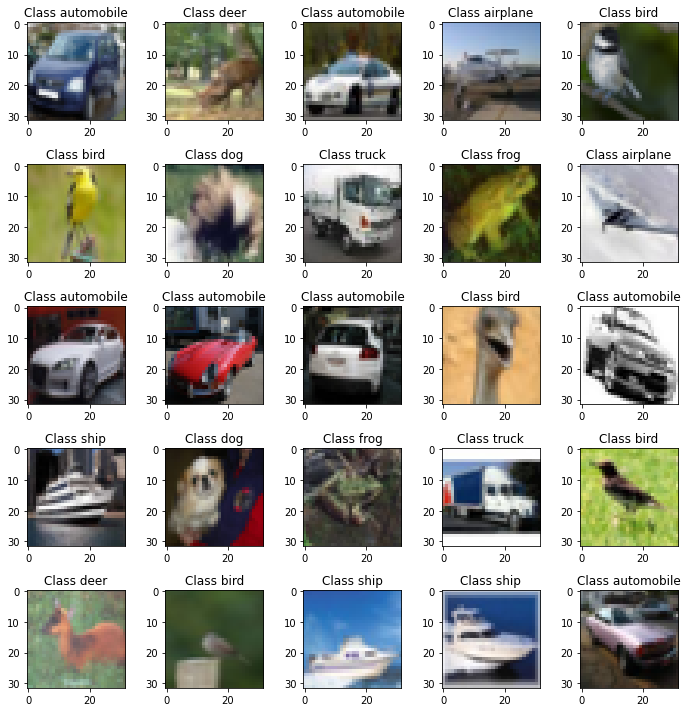

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(dataset_1['val_imgs'][i], cmap= plt.cm.binary)
    plt.title("Class {}".format(class_names[dataset_1['val_lbls'][i]]))
    plt.tight_layout()

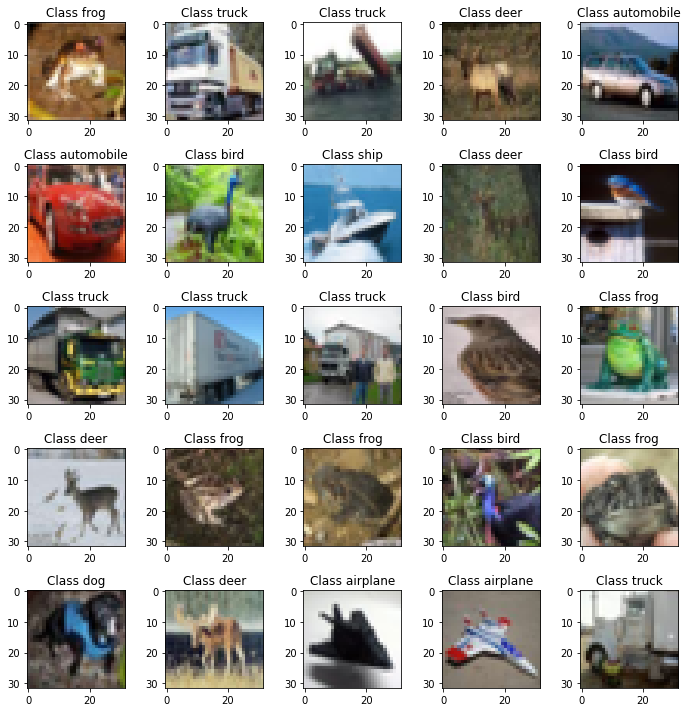

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(dataset_1['train_imgs'][i], cmap= plt.cm.binary)
    plt.title("Class {}".format(class_names[dataset_1['train_lbls'][i]]))
    plt.tight_layout()

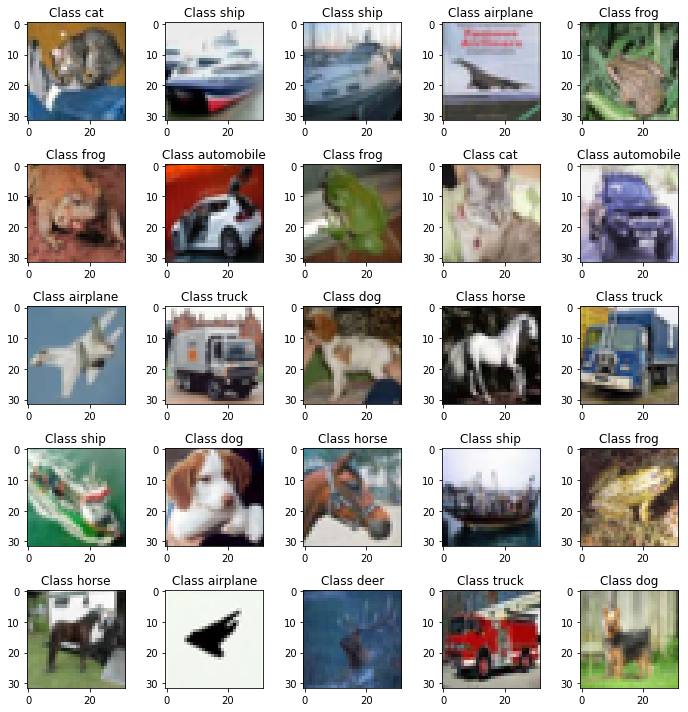

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(dataset_1['test_imgs'][i], cmap= plt.cm.binary)
    plt.title("Class {}".format(class_names[dataset_1['test_lbls'][i]]))
    plt.tight_layout()

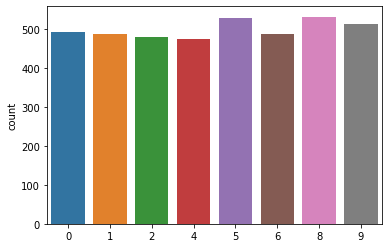

In [ ]:
sns.countplot(dataset_1['val_lbls'])

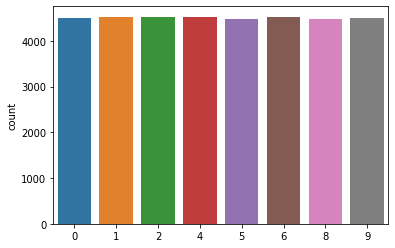

In [ ]:
sns.countplot(dataset_1['train_lbls'])

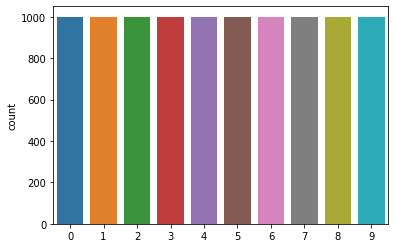

In [ ]:
sns.countplot(dataset_1['test_lbls'])

In [ ]:
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(x=dataset_1['train_imgs'],y=dataset_1['train_lbls'],epochs=10,batch_size=128,validation_data=(dataset_1['val_imgs'],dataset_1['val_lbls']))

Epoch 1/10
282/282 [==============================] - 22s 79ms/step - loss: 2.0809 - accuracy: 0.1258 - val_loss: 2.0793 - val_accuracy: 0.1331
Epoch 2/10
282/282 [==============================] - 22s 78ms/step - loss: 2.0806 - accuracy: 0.1225 - val_loss: 2.0805 - val_accuracy: 0.1189
Epoch 3/10
282/282 [==============================] - 22s 78ms/step - loss: 2.0801 - accuracy: 0.1233 - val_loss: 2.0796 - val_accuracy: 0.1324
Epoch 4/10
282/282 [==============================] - 22s 78ms/step - loss: 2.0800 - accuracy: 0.1243 - val_loss: 2.0797 - val_accuracy: 0.1199
Epoch 5/10
282/282 [==============================] - 22s 78ms/step - loss: 2.0801 - accuracy: 0.1247 - val_loss: 2.0796 - val_accuracy: 0.1221
Epoch 6/10
282/282 [==============================] - 22s 78ms/step - loss: 2.0802 - accuracy: 0.1209 - val_loss: 2.0803 - val_accuracy: 0.1221
Epoch 7/10
282/282 [==============================] - 22s 78ms/step - loss: 2.0802 - accuracy: 0.1235 - val_loss: 2.0802 - val_accuracy:

In data1.npz , As we can notice from the count plots of train , test, and validation labels - 3 and 7 i.e cat and horse labels are missing from train and validation sets but are present for test images.

# Data2.npz

In [ ]:
dataset_2 = np.load("data2.npz")

In [ ]:
dataset_2.files

['train_imgs', 'train_lbls', 'val_imgs', 'val_lbls', 'test_imgs', 'test_lbls']

In [ ]:
print("Number of Training examples:",dataset_2['train_imgs'].shape[0])
print("Number of in Test examples:",dataset_2['test_imgs'].shape[0])
print("Number of in Validation examples:",dataset_2['val_imgs'].shape[0])

print("Train images shape:",dataset_2['train_imgs'].shape)
print("Train labels shape:",dataset_2['train_lbls'].shape)

print("Test images shape:",dataset_2['test_imgs'].shape)
print("Test labels shape:",dataset_2['test_lbls'].shape)

print("Validation images shape:",dataset_2['val_imgs'].shape)
print("Validation labels shape:",dataset_2['val_lbls'].shape)

Number of Training examples: 50000
Number of in Test examples: 10000
Number of in Validation examples: 5000
Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000,)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000,)
Validation images shape: (5000, 32, 32, 3)
Validation labels shape: (5000,)


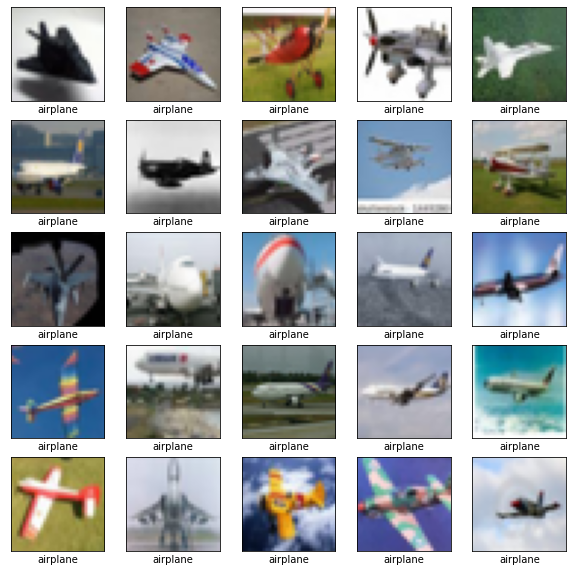

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
i = -1
for j in range(500):
  if(dataset_2['train_lbls'][j] == 0):
    i+=1
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(dataset_2['train_imgs'][j], cmap=plt.cm.binary)
    plt.xlabel(class_names[dataset_2['train_lbls'][j]])
    if(i==24):
      break
plt.show()

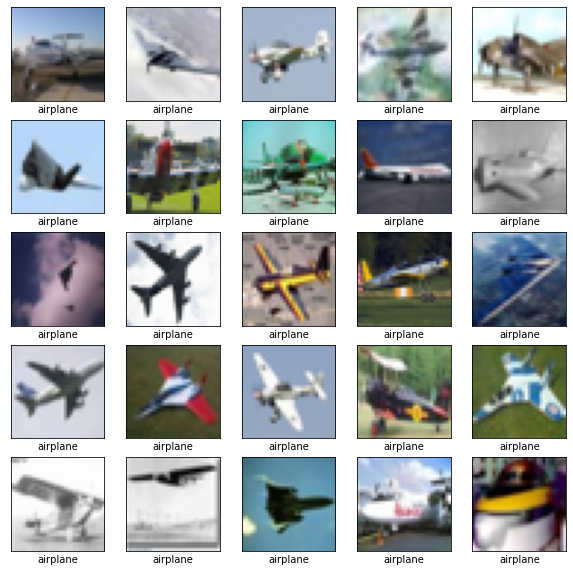

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
i = -1
for j in range(500):
  if(dataset_2['val_lbls'][j] == 0):
    i+=1
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(dataset_2['val_imgs'][j], cmap=plt.cm.binary)
    plt.xlabel(class_names[dataset_2['val_lbls'][j]])
    if(i==24):
      break
plt.show()

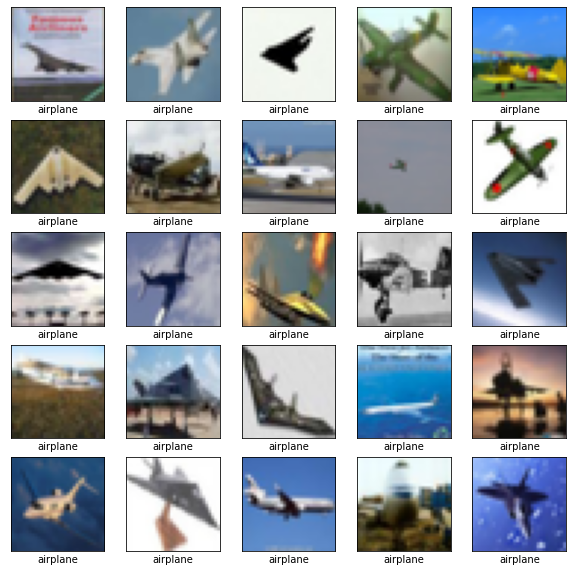

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
i = -1
for j in range(500):
  if(dataset_2['test_lbls'][j] == 0):
    i+=1
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(dataset_2['test_imgs'][j], cmap=plt.cm.binary)
    plt.xlabel(class_names[dataset_2['test_lbls'][j]])
    if(i==24):
      break
plt.show()

In [ ]:
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(x=dataset_2['train_imgs'],y=dataset_2['train_lbls'],epochs=10,batch_size=128,validation_data=(dataset_2['val_imgs'],dataset_2['val_lbls']))

Epoch 1/10
391/391 [==============================] - 32s 81ms/step - loss: 2.5982 - accuracy: 0.0988 - val_loss: 2.4324 - val_accuracy: 0.0950
Epoch 2/10
391/391 [==============================] - 30s 78ms/step - loss: 2.3956 - accuracy: 0.0992 - val_loss: 2.3651 - val_accuracy: 0.1024
Epoch 3/10
391/391 [==============================] - 30s 78ms/step - loss: 2.3428 - accuracy: 0.1000 - val_loss: 2.3260 - val_accuracy: 0.0976
Epoch 4/10
391/391 [==============================] - 30s 78ms/step - loss: 2.3158 - accuracy: 0.0988 - val_loss: 2.3092 - val_accuracy: 0.0950
Epoch 5/10
391/391 [==============================] - 30s 78ms/step - loss: 2.3059 - accuracy: 0.0976 - val_loss: 2.3039 - val_accuracy: 0.0958
Epoch 6/10
391/391 [==============================] - 30s 78ms/step - loss: 2.3033 - accuracy: 0.0991 - val_loss: 2.3028 - val_accuracy: 0.1058
Epoch 7/10
391/391 [==============================] - 30s 78ms/step - loss: 2.3028 - accuracy: 0.0959 - val_loss: 2.3026 - val_accuracy:

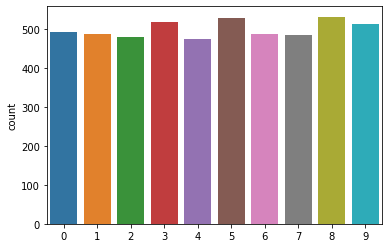

In [ ]:
sns.countplot(dataset_2['val_lbls'])

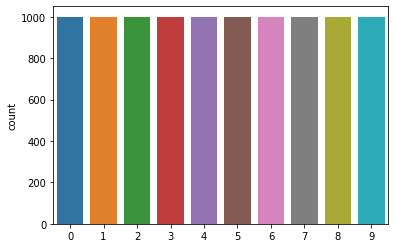

In [ ]:
sns.countplot(dataset_2['test_lbls'])

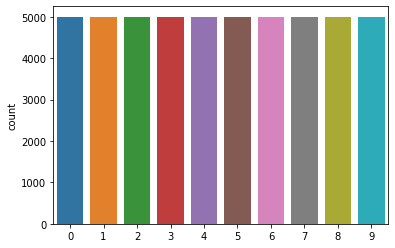

In [ ]:
sns.countplot(dataset_2['train_lbls'])

In data2 npz, classes are not distributed equally in validation data as compared train and test data.

# Data3.npz

In [ ]:
dataset_3 = np.load("data3.npz")

In [ ]:
dataset_3.files

['train_imgs', 'train_lbls', 'val_imgs', 'val_lbls', 'test_imgs', 'test_lbls']

In [ ]:
print("Number of Training examples:",dataset_3['train_imgs'].shape[0])
print("Number of in Test examples:",dataset_3['test_imgs'].shape[0])
print("Number of in Validation examples:",dataset_3['val_imgs'].shape[0])

print("Train images shape:",dataset_3['train_imgs'].shape)
print("Train labels shape:",dataset_3['train_lbls'].shape)

print("Test images shape:",dataset_3['test_imgs'].shape)
print("Test labels shape:",dataset_3['test_lbls'].shape)

print("Validation images shape:",dataset_3['val_imgs'].shape)
print("Validation labels shape:",dataset_3['val_lbls'].shape)

Number of Training examples: 45000
Number of in Test examples: 10000
Number of in Validation examples: 5000
Train images shape: (45000, 32, 32, 3)
Train labels shape: (45000,)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000,)
Validation images shape: (5000, 32, 32, 3)
Validation labels shape: (5000,)


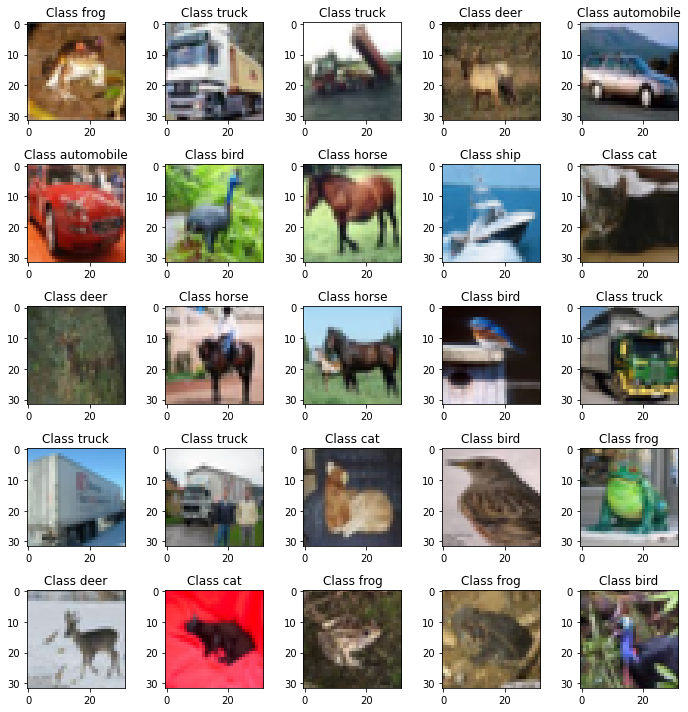

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(dataset_3['train_imgs'][i], cmap= plt.cm.binary)
    plt.title("Class {}".format(class_names[dataset_3['train_lbls'][i]]))
    plt.tight_layout()

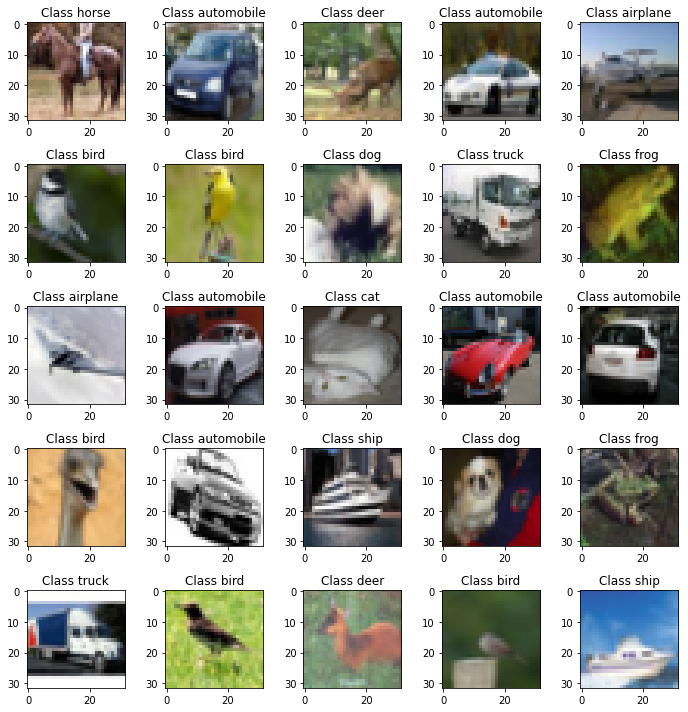

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(dataset_3['val_imgs'][i], cmap= plt.cm.binary)
    plt.title("Class {}".format(class_names[dataset_3['val_lbls'][i]]))
    plt.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

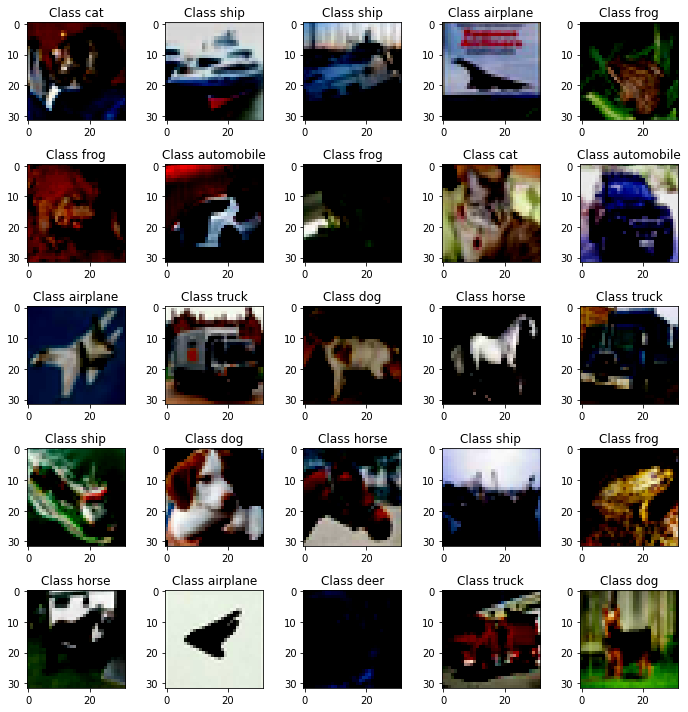

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(dataset_3['test_imgs'][i], cmap= plt.cm.binary)
    plt.title("Class {}".format(class_names[dataset_3['test_lbls'][i]]))
    plt.tight_layout()

In [ ]:
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(x=dataset_3['train_imgs'],y=dataset_3['train_lbls'],epochs=10,batch_size=128,validation_data=(dataset_3['val_imgs'],dataset_3['val_lbls']))

Epoch 1/10
352/352 [==============================] - 28s 81ms/step - loss: 2.3027 - accuracy: 0.0994 - val_loss: 2.3028 - val_accuracy: 0.0950
Epoch 2/10
352/352 [==============================] - 27s 78ms/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3028 - val_accuracy: 0.0958
Epoch 3/10
352/352 [==============================] - 28s 78ms/step - loss: 2.3027 - accuracy: 0.0974 - val_loss: 2.3027 - val_accuracy: 0.0986
Epoch 4/10
352/352 [==============================] - 27s 78ms/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3027 - val_accuracy: 0.0976
Epoch 5/10
352/352 [==============================] - 27s 78ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy: 0.0958
Epoch 6/10
352/352 [==============================] - 27s 78ms/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.0976
Epoch 7/10
352/352 [==============================] - 27s 78ms/step - loss: 2.3027 - accuracy: 0.0974 - val_loss: 2.3027 - val_accuracy:

In data3.npz, validation data and test data belong to different distributions. 
Resolution of images in test data is very high.

# Data4.npz

In [ ]:
dataset_4 = np.load("data4.npz")

In [ ]:
dataset_4.files

['train_imgs', 'train_lbls', 'val_imgs', 'val_lbls', 'test_imgs', 'test_lbls']

In [ ]:
print("Number of Training examples:",dataset_4['train_imgs'].shape[0])
print("Number of in Test examples:",dataset_4['test_imgs'].shape[0])
print("Number of in Validation examples:",dataset_4['val_imgs'].shape[0])

print("Train images shape:",dataset_4['train_imgs'].shape)
print("Train labels shape:",dataset_4['train_lbls'].shape)

print("Test images shape:",dataset_4['test_imgs'].shape)
print("Test labels shape:",dataset_4['test_lbls'].shape)

print("Validation images shape:",dataset_4['val_imgs'].shape)
print("Validation labels shape:",dataset_4['val_lbls'].shape)

Number of Training examples: 45000
Number of in Test examples: 10000
Number of in Validation examples: 5000
Train images shape: (45000, 32, 32, 3)
Train labels shape: (45000,)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000,)
Validation images shape: (5000, 32, 32, 3)
Validation labels shape: (5000,)


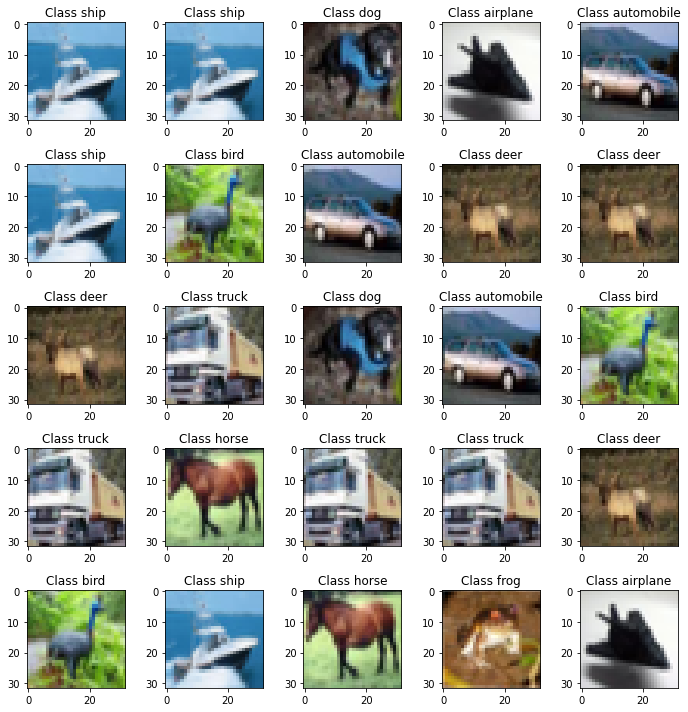

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(dataset_4['train_imgs'][i], cmap= plt.cm.binary)
    plt.title("Class {}".format(class_names[dataset_4['train_lbls'][i]]))
    plt.tight_layout()

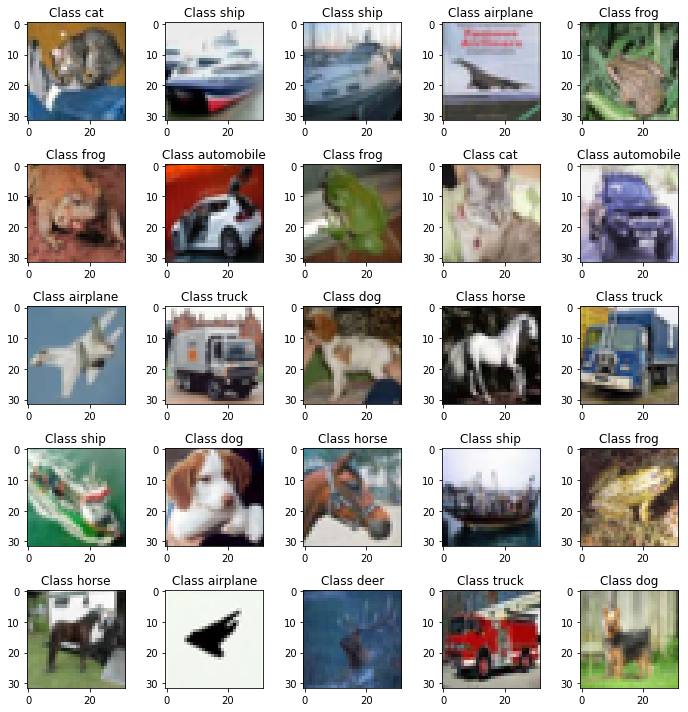

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(dataset_4['test_imgs'][i], cmap= plt.cm.binary)
    plt.title("Class {}".format(class_names[dataset_4['test_lbls'][i]]))
    plt.tight_layout()

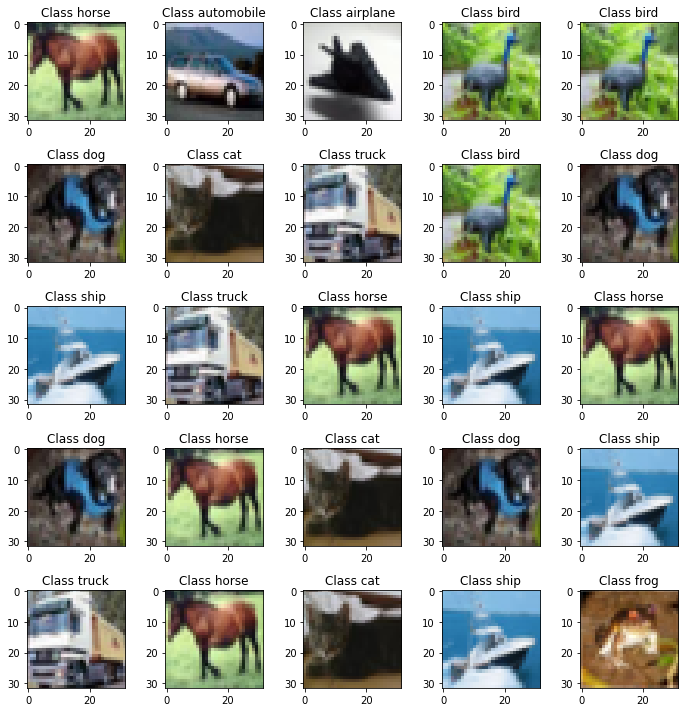

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(dataset_4['val_imgs'][i], cmap= plt.cm.binary)
    plt.title("Class {}".format(class_names[dataset_4['val_lbls'][i]]))
    plt.tight_layout()

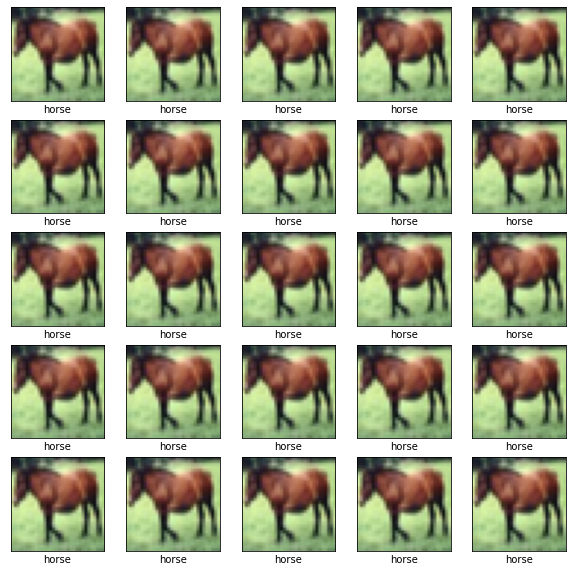

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
i = -1
for j in range(500):
  if(dataset_4['train_lbls'][j] == 7):
    i+=1
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(dataset_4['train_imgs'][j], cmap=plt.cm.binary)
    plt.xlabel(class_names[dataset_4['train_lbls'][j]])
    if(i==24):
      break
plt.show()

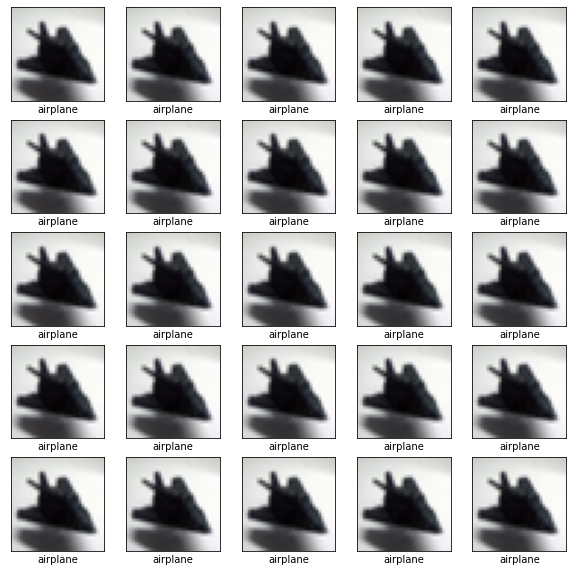

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
i = -1
for j in range(500):
  if(dataset_4['train_lbls'][j] == 0):
    i+=1
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(dataset_4['train_imgs'][j], cmap=plt.cm.binary)
    plt.xlabel(class_names[dataset_4['train_lbls'][j]])
    if(i==24):
      break
plt.show()

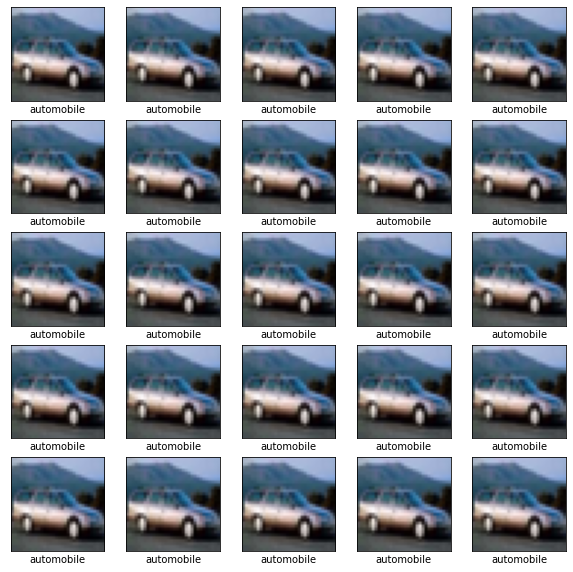

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
i = -1
for j in range(500):
  if(dataset_4['val_lbls'][j] == 1):
    i+=1
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(dataset_4['val_imgs'][j], cmap=plt.cm.binary)
    plt.xlabel(class_names[dataset_4['val_lbls'][j]])
    if(i==24):
      break
plt.show()

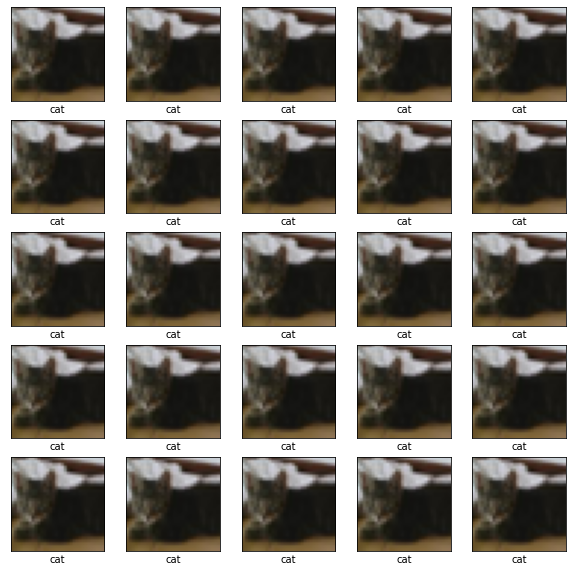

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
i = -1
for j in range(500):
  if(dataset_4['val_lbls'][j] == 3):
    i+=1
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(dataset_4['val_imgs'][j], cmap=plt.cm.binary)
    plt.xlabel(class_names[dataset_4['val_lbls'][j]])
    if(i==24):
      break
plt.show()

In [ ]:
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(x=dataset_4['train_imgs'],y=dataset_4['train_lbls'],epochs=10,batch_size=128,validation_data=(dataset_4['val_imgs'],dataset_4['val_lbls']))

Epoch 1/10
352/352 [==============================] - 28s 79ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
352/352 [==============================] - 27s 78ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
352/352 [==============================] - 27s 78ms/step - loss: 2.3027 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
352/352 [==============================] - 27s 78ms/step - loss: 2.3027 - accuracy: 0.0969 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
352/352 [==============================] - 28s 78ms/step - loss: 2.3027 - accuracy: 0.0957 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
352/352 [==============================] - 27s 78ms/step - loss: 2.3027 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
352/352 [==============================] - 27s 78ms/step - loss: 2.3027 - accuracy: 0.1003 - val_loss: 2.3026 - val_accuracy:

In dataset4.npz, we can see that for train and validation, there are same images for various labels, so model is learning on only one type of images.